# Statistical Modelling Brown Bag

Welcome to the Statistical Modelling brown bag session, where you will be introduced to some of the key concepts we use on a day-to-day basis, and help you think about data in a similar way to us. Run the notebook as the session goes along to see all of this working in real time from your own laptop.

#### Some Jupyter Notebook Instructions
To run a cell within jupyter notebooks, you can click on the cell and press the run button at the top of the window, or you can use 
<kbd>Ctrl</kbd>+<kbd>Enter</kbd>. Also <kbd>Shift</kbd>+<kbd>Enter</kbd> will also run the cell and move you on to the next cell. 

Test this out on the cell below, once you have run it, you will see the words "Hello World" appear underneath the cell.

In [ ]:
print('Hello World')

### Importing packages

Now run the cell below to import the packages we need for the session.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import datasets
import matplotlib.pyplot as plt
import random
from sklearn import metrics

## Linear Regression

### Simple Linear Regression: Iris Dataset

The iris dataset contains information about the sepal/petal width/length from 150 Iris flowers. We will use this data to build some regression models.

![title](iris.jpeg)

This first cell will read in the data we need for our first example of simple linear regression.

In [ ]:
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris['data'])
iris_data.columns = iris['feature_names']
iris_data

In simple linear regression, we are fitting a "line of best fit" to the data which we can then use to make predictions. Let's see if we can predict the sepal length of an irish from the sepal width. Firstly let's take a look at the data.

In [ ]:
plt.scatter(iris_data['petal length (cm)'], iris_data['sepal length (cm)'])
plt.ylabel('sepal length (cm)')
plt.xlabel('petal length (cm)')

There does seem to be some correlation here, so let's try and build a model. Now whilst we will be using the phrase "Linear Model", if this sounds a bit intimidating, just think of it as a line of best fit - this is fundamentally what linear models are doing.

Now recall the form of a line
$$y = ax + b$$
we call $a$ the gradient, and $b$ the y-intercept. Remember

* $a$: the gradient tells you how far you need to move up, for every one unit you move across
* $b$: the y-intercept tells you where you would cross the y-axis (when x = 0)

Now let's fit and plot our linear model

In [ ]:
reg = LinearRegression(fit_intercept=True)
x = np.array(iris_data['petal length (cm)']).reshape((-1, 1))
y = np.array(iris_data['sepal length (cm)'])
mod = reg.fit(x,y)
print(f"intercept: {mod.intercept_}")
print(f"slope: {mod.coef_}")

So the equation of the line is 

$$y = 0.41x + 4.31$$ 

Which we can plot on our graph from before

In [ ]:
plt.scatter(iris_data['petal length (cm)'], iris_data['sepal length (cm)'])
plt.ylabel('sepal length (cm)')
plt.xlabel('petal length (cm)')
xmin = min(iris_data['petal length (cm)'])-1
xmax = max(iris_data['petal length (cm)'])+1
ymin = mod.intercept_ + mod.coef_[0]*xmin
ymax = mod.intercept_ + mod.coef_[0]*xmax
plt.plot([xmin, xmax], [ymin, ymax], color='red')

Given a new petal length measurement, say 3cm, we can use our model to get the expected sepal length:

In [ ]:
new_value = mod.predict(np.array([3]).reshape(-1, 1))[0]
print("When the petal length is 3cm, the expected sepal length is " + str(np.round(new_value, 2)) + "cm")

### Multiple Linear Regression

Linear regression actually allows us to use more than one predictor. Instead of just using petal length, we can also use petal length and sepal width! In an equation, it would be

$$y = a + b \times \text{petal_length} + c \times \text{sepal_width} + d \times \text{petal_width}$$

where $a$ is still the y-intercept, and this time $b, c$ and $d$ are the slopes of the petal length, sepal width and petal width respectively.

In [ ]:
x = np.array(iris_data[['petal length (cm)', 'sepal width (cm)', 'petal width (cm)']]).reshape((-1, 3))
y = np.array(iris_data['sepal length (cm)'])
mod = reg.fit(x,y)

print(f"intercept: {mod.intercept_}")
print(f"slope: {mod.coef_}")

and similarly we can use this model to make predidctions given new data. Say we once again have an iris with a petal length of 3cm, but we now also know the sepal width is 3.5cm and the petal width is 2.4cm, we can use our model to calculate the expected petal length.

In [ ]:
pred = mod.predict(np.array([3, 3.5, 2.4]).reshape(-1, 3))[0]
print('The expected petal length is ' + str(np.round(pred, 2)) + 'cm')

### Regression for classification - Logistic Regression

In the iris example, we are looking at predicting a *continuous* response. In classification tasks, we look to model classified data - a good example of a classification task is the matching, where we classify a client control, and the classes are the Acin controls. We can use a variant of linear regression for binary classification tasks - binary meaning two classes. Let's see how this can work.


Kaggle is a company that run Machine Learning competitions, and one of the most famous is predicting survival on the titanic, with over 14,000 thousand teams having submitted over 60,000 classification models. We will use this for our example.

In [ ]:
titanic = pd.read_csv('Titanic.csv')
titanic

First off, we will need to encode categorical variables, here the only one is Sex.

In [ ]:
cat_vars=['Sex']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(titanic[var], prefix=var)
    titanic1=titanic.join(cat_list)
    titanic=titanic1
titanic

See that we now have one column indicating whether the passenger was Male (Sex_male), and another if the passenger is Female (Sex_female). We will use the Sex_female column to estimate the effect of Sex on Survival.

We will split this dataset into a training set and test set. We will use the training set to fit the parameters, and the test set to see how well the model performs on unseen data. We will use an 80-20 split, that is 80% of the data will be used for training, and 20% used for testing.

In [22]:
l = len(titanic['Survived'])
random.seed(10) # Set random seed so that results are consistent
train = random.sample(list(range(l)), int(l*0.8))
train_set = titanic.iloc[train]
test = [x for x in range(l) if x not in train]
test_set = titanic.iloc[test]

print(str(len(train)) + ' number of records in training set')
print(str(len(test)) + ' number of records in test set')

709 number of records in training set
178 number of records in test set


Note that setting a seed is important for reproducibility! If you put a '#' at the beginning of the second line in the cell above (the line should turn a greeny-blue colour), and run the remaining code repeatedly, you will find you get different answers every time because the splits are different!

*Cross Validation* is a method that allows you to understand the variability of your model performance under different train-test splits - here is a link for those interesting: https://en.wikipedia.org/wiki/Cross-validation_(statistics). We will not cover that in this presentation.

Let's start by building a model that predicts whether the passenger survived or not based on only Sex and Age.

In [23]:
from sklearn.linear_model import LogisticRegression
log_mod = LogisticRegression()
x_train = np.array(train_set[['Sex_female', 'Age']]).reshape((-1, 2))
y_train = np.array(train_set['Survived'])
fitted = log_mod.fit(x_train, y_train)

print(f"intercept: {fitted.intercept_}")
print(f"slope: {fitted.coef_}")

intercept: [-1.26840257]
slope: [[ 2.4103644  -0.00513948]]


We can actually use the slope values to understand their effect on Survival. Sex_female has a positive slope, meaning that if you are female, you are more likely to have survived (the positive slope pushes the output towards Survived=1). Age has a negative coefficient, meaning that if you were older, you were less likely to have survived (the negative means the higher the age, the more the output it pushed towards Survived=0).

Now, time to find out if, by your age and sex, you would have survived the titanic!

In [24]:
your_Age = 20 # Enter your own age here
your_IsFemale = 1 # Swap the 0 for a 1 if you are female

surv_pred = fitted.predict(np.array([your_IsFemale, your_Age]).reshape(-1, 2))[0]

if surv_pred == 1:
    print('You Survived!')
else:
    print("Eek, our model doesn't think you'd have made it based on your age and Sex")

You Survived!


Now, we have to question here whether this model is "good" or not. This model in theory is a fairly sensible one - the "women and childeren first" policy was famously employed on the Titanic during the evacuation, with one of the crew interpreting the order as "women and childeren only" and released lifeboats with empty seats if there were no women and childeren nearby, refusing men waiting to evacuate entry.

#### Accuracy

Here we look at what percentage of the elements in the test set were correctly classified by our model.

In [25]:
x_test = np.array(test_set[['Sex_female', 'Age']]).reshape((-1, 2))
y_test = np.array(test_set['Survived'])

score = fitted.score(x_test, y_test)
print(str(np.round(score, 4)*100) + '% of test set elements were correctly predicted.')

78.64999999999999% of test set elements were correctly predicted.


That doesn't sound too bad! Typically in tasks like this, we would use model selection techniques, using statistical approaches to determine which variables are most significant to include in the model, and discard those that are not significant. There are other model selection criteria we can use like Akike's Information Criterion and Bayesian Information Criterion - these look for models that best fit the data with the smallest number of parameters. We will not go into this today.


One other thing we can use to evaluate model performance is the *ROC* curve (*R*eciever *O*perating *C*haracteristic). This shows us, as we move the threshold for classification (different values from the 0.5 mentioned in the presentation), the change in true and false positive rate. The diagonal line shows us how a simple random guess would perform, and the more above that line the model is, the better it's performance.

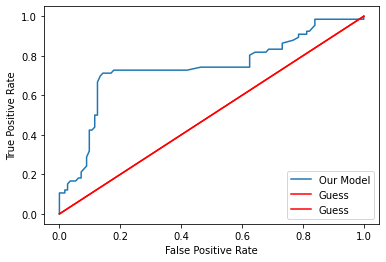

In [26]:
y_pred_proba = fitted.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr, label='Our Model')
plt.plot([[0,0], [1,1]], color='red', label = 'Guess')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()